In [2]:
import pandas as pd
file = pd.read_csv('insurance.csv')

print(file.info())
print(file.shape)

file.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
file.duplicated().any()
file =file.drop_duplicates()

In [4]:
file.sample(5)

,age,sex,bmi,children,smoker,region,charges
1304,42,male,24.605,2,yes,northeast,21259.37795
479,23,male,32.560,0,no,southeast,1824.28540
1254,34,female,27.720,0,no,southeast,4415.15880
666,49,male,28.700,1,no,southwest,8703.45600
64,20,female,22.420,0,yes,northwest,14711.74380


In [5]:
file =file.drop_duplicates().reset_index()
file.shape

(1337, 8)

<AxesSubplot:>

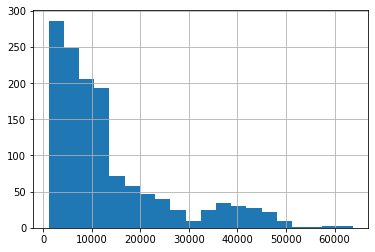

In [6]:
file['charges'].hist(bins=20)

<AxesSubplot:>

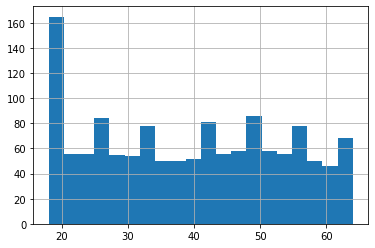

In [7]:
file['age'].hist(bins=20)

<AxesSubplot:>

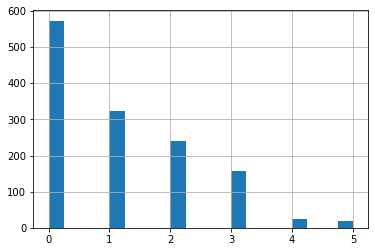

In [8]:
file['children'].hist(bins=20)

In [9]:
file[['sex', 'charges']].groupby(by='sex').mean()

,charges
sex,
female,12569.578844
male,13974.998864


In [10]:
file[['smoker', 'charges']].groupby(by='smoker').mean()

,charges
smoker,
no,8440.660307
yes,32050.231832


In [11]:
file[['smoker', 'charges']].groupby(by='smoker').describe()

charges                                                        \
         count          mean           std         min           25%   
smoker                                                                 
no      1063.0   8440.660307   5992.973800   1121.8739   3988.883500   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                                                
                50%           75%          max  
smoker                                          
no       7345.72660  11363.019100  36910.60803  
yes     34456.34845  41019.207275  63770.42801

In [12]:
file[['children', 'charges']].groupby(by='children').mean('charges').sort_values(by='charges', ascending=False)

,charges
children,
3,15355.318367
2,15073.563734
4,13850.656311
1,12731.171832
0,12384.695344
5,8786.035247


In [13]:
file['user_ID'] = pd.DataFrame(file.index).astype(int)
file = file[['user_ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
file

# file_feat_transp_count = pd.DataFrame(file_feat_transp[file_feat_transp[col]].sum())

,user_ID,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1332,50,male,30.970,3,no,northwest,10600.54830
1333,1333,18,female,31.920,0,no,northeast,2205.98080
1334,1334,18,female,36.850,0,no,southeast,1629.83350
1335,1335,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df_user = (
    file[['user_ID', 'charges']]
    .groupby('user_ID')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_user['cumsum'] = df_user['total_charges'].cumsum()
value_80proc = int(df_user['total_charges'].sum()*0.8)
df_user['top_user'] = df_user['cumsum'] > value_80proc

top_user = set(df_user[df_user['top_user']]['user_ID'])
len(top_user)/file['user_ID'].nunique()

0.5205684367988033

In [15]:
df_user

,user_ID,total_charges,cumsum,top_user
543,543,63770.42801,6.377043e+04,False
1299,1299,62592.87309,1.263633e+05,False
1229,1229,60021.39897,1.863847e+05,False
577,577,58571.07448,2.449558e+05,False
818,818,55135.40209,3.000912e+05,False
...,...,...,...,...
22,22,1137.01100,1.774966e+07,True
662,662,1136.39940,1.775080e+07,True
1243,1243,1135.94070,1.775193e+07,True
807,807,1131.50660,1.775306e+07,True


In [17]:
df_user_worst = (
    file[['user_ID', 'charges']]
    .groupby('user_ID')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_user_worst['cumsum'] = df_user_worst['total_charges'].cumsum()
value_80proc = int(df_user_worst['total_charges'].sum()*0.8)
df_user_worst['undesirable_user'] = df_user_worst['cumsum'] < value_80proc


In [18]:
df_user_worst=df_user_worst[['user_ID', 'undesirable_user']]
df_user_worst = df_user_worst.merge(file, on='user_ID')
df_user_worst = df_user_worst[df_user_worst['undesirable_user'] ==True]
df_user_worst

,user_ID,undesirable_user,age,sex,bmi,children,smoker,region,charges
0,543,True,54,female,47.410,0,yes,southeast,63770.42801
1,1299,True,45,male,30.360,0,yes,southeast,62592.87309
2,1229,True,52,male,34.485,3,yes,northwest,60021.39897
3,577,True,31,female,38.095,1,yes,northeast,58571.07448
4,818,True,33,female,35.530,0,yes,northwest,55135.40209
...,...,...,...,...,...,...,...,...,...
636,682,True,53,male,24.320,0,no,northwest,9863.47180
637,527,True,51,female,25.800,1,no,southwest,9861.02500
638,279,True,51,female,21.560,1,no,southeast,9855.13140
639,1027,True,54,male,31.600,0,no,southwest,9850.43200


In [19]:
df_user = df_user[['user_ID', 'top_user']]
file = file.merge(df_user, on='user_ID')
file =file[file['top_user'] ==True]
file

,user_ID,age,sex,bmi,children,smoker,region,charges,top_user
1,1,18,male,33.77,1,no,southeast,1725.5523,True
2,2,28,male,33.00,3,no,southeast,4449.4620,True
4,4,32,male,28.88,0,no,northwest,3866.8552,True
5,5,31,female,25.74,0,no,southeast,3756.6216,True
6,6,46,female,33.44,1,no,southeast,8240.5896,True
...,...,...,...,...,...,...,...,...,...
1325,1325,42,female,32.87,0,no,northeast,7050.0213,True
1326,1326,51,male,30.03,1,no,southeast,9377.9047,True
1333,1333,18,female,31.92,0,no,northeast,2205.9808,True
1334,1334,18,female,36.85,0,no,southeast,1629.8335,True


In [20]:
df_children = (
    file[['children', 'charges']]
    .groupby('children')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_children['cumsum'] = df_children['total_charges'].cumsum()
value_80proc = int(df_children['total_charges'].sum()*0.8)
df_children['top_children'] = df_children['cumsum'] > value_80proc

top_children = set(df_children[df_children['top_children']]['children'])
df_children = df_children[['children', 'top_children']]

In [21]:
len(top_children)/file['children'].nunique()

0.6666666666666666

In [22]:
df_children

,children,top_children
1,1,False
0,0,False
2,2,True
3,3,True
5,5,True
4,4,True


In [23]:
df_smoker = (
    file[['smoker', 'charges']]
    .groupby('smoker')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_smoker['cumsum'] = df_smoker['total_charges'].cumsum()
value_80proc = int(df_smoker['total_charges'].sum()*0.8)
df_smoker['top_smoker'] = df_smoker['cumsum'] > value_80proc

top_smoker= set(df_smoker[df_smoker['top_smoker']]['smoker'])
df_smoker = df_smoker[['smoker', 'top_smoker']]

In [24]:
len(top_smoker)/file['smoker'].nunique()

1.0

In [25]:
df_age = (
    file[['age', 'charges']]
    .groupby('age')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_age['cumsum'] = df_age['total_charges'].cumsum()
value_80proc = int(df_age['total_charges'].sum()*0.8)
df_age['top_age'] = df_age['cumsum'] > value_80proc

top_age= set(df_age[df_age['top_age']]['age'])
df_age[['age', 'top_age']].groupby(by='top_age').describe()
df_age = df_age[['age', 'top_age']]

In [26]:
len(top_age)/file['age'].nunique()

0.3611111111111111

In [27]:
df_sex = (
    file[['sex', 'charges']]
    .groupby('sex')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_sex['cumsum'] = df_sex['total_charges'].cumsum()
value_80proc = int(df_sex['total_charges'].sum()*0.8)
df_sex['top_sex'] = df_sex['cumsum'] > value_80proc

top_sex= set(df_sex[df_sex['top_sex']]['sex'])
df_sex = df_sex[['sex', 'top_sex']]

In [28]:
len(top_sex)/file['sex'].nunique()

0.5

In [29]:
df_bmi = (
    file[['bmi', 'charges']]
    .groupby('bmi')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_bmi['cumsum'] = df_bmi['total_charges'].cumsum()
value_80proc = int(df_bmi['total_charges'].sum()*0.8)
df_bmi['top_bmi'] = df_bmi['cumsum'] > value_80proc

top_bmi= set(df_bmi[df_bmi['top_bmi']]['bmi'])
df_bmi[['bmi', 'top_bmi']].groupby(by='top_bmi').describe()
df_bmi = df_bmi[['bmi', 'top_bmi']]

In [30]:
len(top_bmi)/file['bmi'].nunique()

0.44862155388471175

In [31]:
df_region = (
    file[['region', 'charges']]
    .groupby('region')
    .agg('sum')
    .reset_index()
    .sort_values(by='charges', ascending=False)
    .rename(columns={'charges':'total_charges'})
)

df_region['cumsum'] = df_region['total_charges'].cumsum()
value_80proc = int(df_region['total_charges'].sum()*0.8)
df_region['top_region'] = df_region['cumsum'] > value_80proc

top_region= set(df_region[df_region['top_region']]['region'])
df_region = df_region[['region', 'top_region']]

In [32]:
len(top_region)/file['region'].nunique()

0.25

In [33]:
file = file.merge(df_region, on='region')
file = file.merge(df_children, on='children')
file = file.merge(df_smoker, on='smoker')
file = file.merge(df_age, on='age')
file = file.merge(df_sex, on='sex')
file = file.merge(df_bmi, on='bmi')
file


,user_ID,age,sex,bmi,children,smoker,region,charges,top_user,top_region,top_children,top_smoker,top_age,top_sex,top_bmi
0,1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,True
1,1096,22,male,33.770,0,no,southeast,1674.63230,True,False,False,True,True,True,True
2,270,18,male,29.370,1,no,southeast,1719.43630,True,False,False,True,False,True,False
3,609,47,female,29.370,1,no,southeast,8547.69130,True,False,False,True,False,False,False
4,709,18,male,35.200,1,no,southeast,1727.54000,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,81,45,female,38.285,0,no,northeast,7935.29115,True,True,False,True,False,False,False
692,445,45,female,33.100,0,no,southwest,7345.08400,True,False,False,True,False,False,False
693,652,45,female,36.300,2,no,southeast,8527.53200,True,False,True,True,False,False,False
694,1233,45,female,27.830,2,no,southeast,8515.75870,True,False,True,True,False,False,False


In [34]:
file_feat = file[['top_region', 'top_children', 'top_smoker', 'top_age', 'top_sex', 'top_bmi']]
file_feat

,top_region,top_children,top_smoker,top_age,top_sex,top_bmi
0,False,False,True,False,True,True
1,False,False,True,True,True,True
2,False,False,True,False,True,False
3,False,False,True,False,False,False
4,False,False,True,False,True,False
...,...,...,...,...,...,...
691,True,False,True,False,False,False
692,False,False,True,False,False,False
693,False,True,True,False,False,False
694,False,True,True,False,False,False


In [36]:
file_feat_transp =file_feat.transpose()
file_feat_transp.sum()



file_feat_transp_count =pd.DataFrame(file_feat_transp.sum())
file_feat_transp_count

file_feat_transp_count['user_ID'] = file['user_ID']
file_feat_transp_count
  

,0,user_ID
0,3,1
1,4,1096
2,2,270
3,1,609
4,2,709
...,...,...
691,2,81
692,1,445
693,2,652
694,2,1233


In [35]:
# file_feat['sum_top'] = file_feat_transp_count
# file_feat= file_feat[['user_ID', 'sum_top']]
# print(file_feat.shape)

In [37]:
file = file.merge(file_feat_transp_count, on='user_ID', how='left')
file.head()
file.rename(columns={0 :'sum_top'}, inplace=True)
file

,user_ID,age,sex,bmi,children,smoker,region,charges,top_user,top_region,top_children,top_smoker,top_age,top_sex,top_bmi,sum_top
0,1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,True,3
1,1096,22,male,33.770,0,no,southeast,1674.63230,True,False,False,True,True,True,True,4
2,270,18,male,29.370,1,no,southeast,1719.43630,True,False,False,True,False,True,False,2
3,609,47,female,29.370,1,no,southeast,8547.69130,True,False,False,True,False,False,False,1
4,709,18,male,35.200,1,no,southeast,1727.54000,True,False,False,True,False,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,81,45,female,38.285,0,no,northeast,7935.29115,True,True,False,True,False,False,False,2
692,445,45,female,33.100,0,no,southwest,7345.08400,True,False,False,True,False,False,False,1
693,652,45,female,36.300,2,no,southeast,8527.53200,True,False,True,True,False,False,False,2
694,1233,45,female,27.830,2,no,southeast,8515.75870,True,False,True,True,False,False,False,2


In [38]:
file['sum_top'] = file['sum_top'].replace(6,1)
file['sum_top'] = file['sum_top'].replace(5,2)
file['sum_top'] = file['sum_top'].replace(4,3)
file['sum_top'] = file['sum_top'].replace(3,4)
file['sum_top'] = file['sum_top'].replace(2,5)
file['sum_top'] = file['sum_top'].replace(1,6)
file['sum_top'] = file['sum_top'].replace(0,7)
file

,user_ID,age,sex,bmi,children,smoker,region,charges,top_user,top_region,top_children,top_smoker,top_age,top_sex,top_bmi,sum_top
0,1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,True,4
1,1096,22,male,33.770,0,no,southeast,1674.63230,True,False,False,True,True,True,True,4
2,270,18,male,29.370,1,no,southeast,1719.43630,True,False,False,True,False,True,False,5
3,609,47,female,29.370,1,no,southeast,8547.69130,True,False,False,True,False,False,False,6
4,709,18,male,35.200,1,no,southeast,1727.54000,True,False,False,True,False,True,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,81,45,female,38.285,0,no,northeast,7935.29115,True,True,False,True,False,False,False,5
692,445,45,female,33.100,0,no,southwest,7345.08400,True,False,False,True,False,False,False,6
693,652,45,female,36.300,2,no,southeast,8527.53200,True,False,True,True,False,False,False,5
694,1233,45,female,27.830,2,no,southeast,8515.75870,True,False,True,True,False,False,False,5


In [39]:
file.rename(columns={'sum_top' :'category'}, inplace=True)
file = file[['user_ID','age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'category']]
file['category'].value_counts()

4    359
5    251
6     86
Name: category, dtype: int64

In [40]:
file['category'] = file['category'].replace(4,1)
file['category'] = file['category'].replace(5,2)
file['category'] = file['category'].replace(6,3)
file.sample(5)

<ipython-input-40-a4afc213b6ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['category'] = file['category'].replace(4,1)
<ipython-input-40-a4afc213b6ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['category'] = file['category'].replace(5,2)
<ipython-input-40-a4afc213b6ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,user_ID,age,sex,bmi,children,smoker,region,charges,category
440,393,49,male,31.350,1,no,northeast,9290.13950,1
118,200,19,female,32.110,0,no,northwest,2130.67590,2
593,407,47,female,23.600,1,no,southwest,8539.67100,3
185,1319,31,male,31.065,3,no,northwest,5425.02335,1
357,871,42,male,24.860,0,no,southeast,5966.88740,1


In [41]:
df_user_worst['category'] = 4
df_user_worst = df_user_worst[['user_ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'category']]
df_user_worst


,user_ID,age,sex,bmi,children,smoker,region,charges,category
0,543,54,female,47.410,0,yes,southeast,63770.42801,4
1,1299,45,male,30.360,0,yes,southeast,62592.87309,4
2,1229,52,male,34.485,3,yes,northwest,60021.39897,4
3,577,31,female,38.095,1,yes,northeast,58571.07448,4
4,818,33,female,35.530,0,yes,northwest,55135.40209,4
...,...,...,...,...,...,...,...,...,...
636,682,53,male,24.320,0,no,northwest,9863.47180,4
637,527,51,female,25.800,1,no,southwest,9861.02500,4
638,279,51,female,21.560,1,no,southeast,9855.13140,4
639,1027,54,male,31.600,0,no,southwest,9850.43200,4


In [42]:
file = pd.concat([file, df_user_worst])
file

,user_ID,age,sex,bmi,children,smoker,region,charges,category
0,1,18,male,33.77,1,no,southeast,1725.5523,1
1,1096,22,male,33.77,0,no,southeast,1674.6323,1
2,270,18,male,29.37,1,no,southeast,1719.4363,2
3,609,47,female,29.37,1,no,southeast,8547.6913,3
4,709,18,male,35.20,1,no,southeast,1727.5400,2
...,...,...,...,...,...,...,...,...,...
636,682,53,male,24.32,0,no,northwest,9863.4718,4
637,527,51,female,25.80,1,no,southwest,9861.0250,4
638,279,51,female,21.56,1,no,southeast,9855.1314,4
639,1027,54,male,31.60,0,no,southwest,9850.4320,4


In [43]:
# pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies = pd.get_dummies(file[['sex', 'smoker', 'region']])
file_dummies['user_ID'] = file['user_ID']
file_dummies

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,user_ID
0,0,1,1,0,0,0,1,0,1
1,0,1,1,0,0,0,1,0,1096
2,0,1,1,0,0,0,1,0,270
3,1,0,1,0,0,0,1,0,609
4,0,1,1,0,0,0,1,0,709
...,...,...,...,...,...,...,...,...,...
636,0,1,1,0,0,1,0,0,682
637,1,0,1,0,0,0,0,1,527
638,1,0,1,0,0,0,1,0,279
639,0,1,1,0,0,0,0,1,1027


In [44]:
file = file.merge(file_dummies, on='user_ID')
file = file[['user_ID', 'age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges', 'category']]
file = file.sort_values(by='user_ID')
file = file[['age', 'sex_female', 'sex_male', 'bmi', 'children', 'smoker_no', 'smoker_yes','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'charges', 'category']]
file

,age,sex_female,sex_male,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,category
1027,19,1,0,27.900,0,0,1,0,0,0,1,16884.92400,4
0,18,0,1,33.770,1,1,0,0,0,1,0,1725.55230,1
123,28,0,1,33.000,3,1,0,0,0,1,0,4449.46200,1
935,33,0,1,22.705,0,1,0,0,1,0,0,21984.47061,4
245,32,0,1,28.880,0,1,0,0,1,0,0,3866.85520,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,50,0,1,30.970,3,1,0,0,1,0,0,10600.54830,4
526,18,1,0,31.920,0,1,0,1,0,0,0,2205.98080,2
473,18,1,0,36.850,0,1,0,0,0,1,0,1629.83350,3
507,21,1,0,25.800,0,1,0,0,0,0,1,2007.94500,2


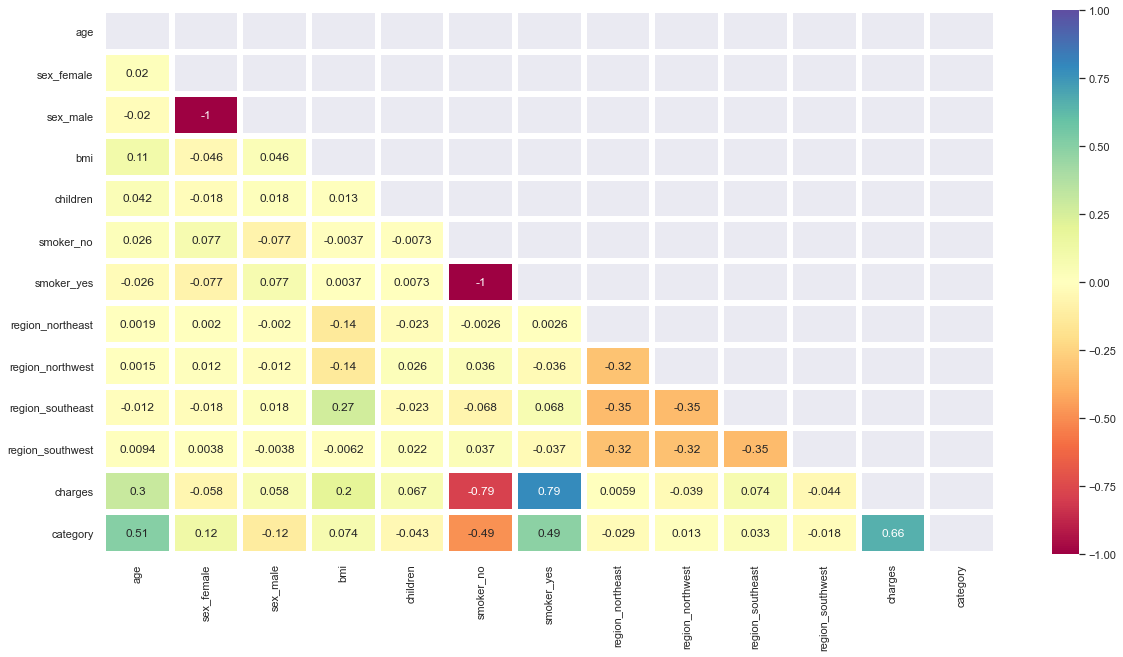

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
correlation_matrix = file.corr()
sns.set(rc={'figure.figsize':(20,10)}) 
mask = np.triu(np.ones_like(correlation_matrix), k=0) 
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

## Base models

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = file.drop(['charges', 'category'], axis=1)
y = file['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_pred = lnr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

MSE: 35478020.67523558, MAE: 4177.045561036319, R^2: 0.8069287081198013


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


X = file.drop(['charges', 'category'], axis=1)
y = file['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))



MSE: 0.8880597014925373, MAE: 0.4552238805970149, R^2: 0.4697877787845285
Accuracy: 0.7089552238805971


c:\Users\patry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


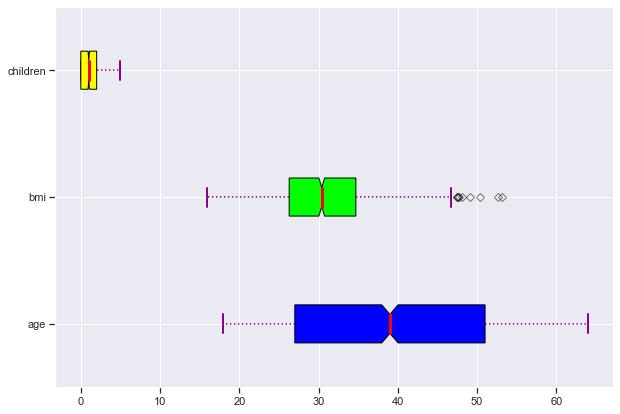

In [49]:
import matplotlib.pyplot as plt
import numpy as np

data_1 = file['age']
data_2 = file['bmi']
data_3 = file['children']
data = [data_1, data_2, data_3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

ax.set_yticklabels(['age', 'bmi',
                    'children'])

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()

In [50]:
for x in ['bmi']:
    q75,q25 = np.percentile(file.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    file.loc[file[x] < min,x] = np.nan
    file.loc[file[x] > max,x] = np.nan

In [51]:
file.isnull().sum()

age                 0
sex_female          0
sex_male            0
bmi                 9
children            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
charges             0
category            0
dtype: int64

In [52]:
M = np.tril(correlation_matrix.to_numpy(), k=-1) 
r, c = np.where(np.abs(M)>=0.8)# określenie indeksów wierszy i kolumn dla których |R|>=0.8

c = np.unique(c) 
c # indeksy zmiennych, które nalezy usunąć

array([1, 5], dtype=int64)

In [53]:
file = file.drop(columns=['sex_female', 'smoker_no'])
file

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,category
1027,19,0,27.900,0,1,0,0,0,1,16884.92400,4
0,18,1,33.770,1,0,0,0,1,0,1725.55230,1
123,28,1,33.000,3,0,0,0,1,0,4449.46200,1
935,33,1,22.705,0,0,0,1,0,0,21984.47061,4
245,32,1,28.880,0,0,0,1,0,0,3866.85520,2
...,...,...,...,...,...,...,...,...,...,...,...
1286,50,1,30.970,3,0,0,1,0,0,10600.54830,4
526,18,0,31.920,0,0,1,0,0,0,2205.98080,2
473,18,0,36.850,0,0,0,0,1,0,1629.83350,3
507,21,0,25.800,0,0,0,0,0,1,2007.94500,2


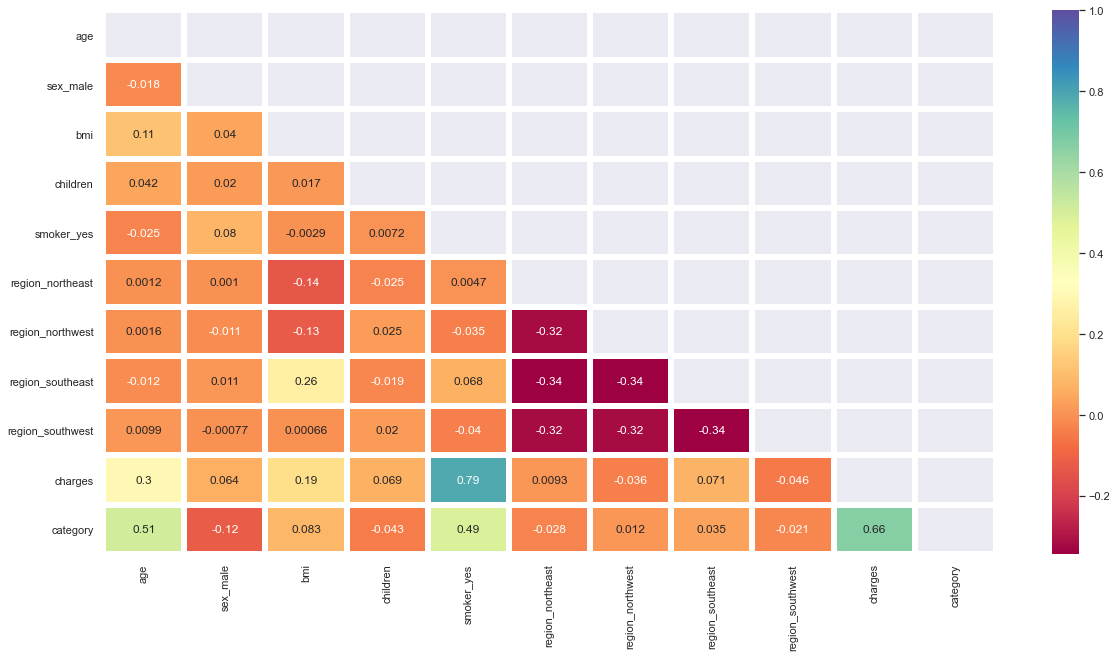

In [54]:
file = file.dropna(axis = 0)
correlation_matrix = file.corr()
sns.set(rc={'figure.figsize':(20,10)}) 
mask = np.triu(np.ones_like(correlation_matrix), k=0) 
sns.heatmap(correlation_matrix, annot=True, cmap = 'Spectral', linewidths=5, mask=mask, vmax=1)
pass

In [55]:
file.head()

,age,sex_male,bmi,children,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,category
1027,19,0,27.900,0,1,0,0,0,1,16884.92400,4
0,18,1,33.770,1,0,0,0,1,0,1725.55230,1
123,28,1,33.000,3,0,0,0,1,0,4449.46200,1
935,33,1,22.705,0,0,0,1,0,0,21984.47061,4
245,32,1,28.880,0,0,0,1,0,0,3866.85520,2


In [56]:
print(file.shape)
file.columns

(1328, 11)


Index(['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges',
       'category'],
      dtype='object')

In [57]:
import xgboost as xgb
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

In [58]:
X=file.drop(['charges','category'], axis=1)
y=file['charges']

print(X)
print(y)

      age  sex_male     bmi  children  smoker_yes  region_northeast  \
1027   19         0  27.900         0           1                 0   
0      18         1  33.770         1           0                 0   
123    28         1  33.000         3           0                 0   
935    33         1  22.705         0           0                 0   
245    32         1  28.880         0           0                 0   
...   ...       ...     ...       ...         ...               ...   
1286   50         1  30.970         3           0                 0   
526    18         0  31.920         0           0                 1   
473    18         0  36.850         0           0                 0   
507    21         0  25.800         0           0                 0   
861    61         0  29.070         0           1                 0   

      region_northwest  region_southeast  region_southwest  
1027                 0                 0                 1  
0                    0   

In [59]:


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [60]:
print(' Train : ', X_train.shape, y_train.shape,'\n', 'Test' , X_test.shape, y_test.shape)

 Train :  (929, 9) (929,) 
 Test (399, 9) (399,)


In [61]:
print('sex_male :\n ',X_train.sex_male.value_counts())


sex_male :
  1    474
0    455
Name: sex_male, dtype: int64


In [62]:
model_x1=xgb.XGBRegressor()
model_x1
model_x1.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
y_pred=model_x1.predict(X_test)
print(y_pred[0:5])

[ 5300.853 11765.483  8610.477  7596.407  6468.503]


In [64]:
print('Score R2 : ',model_x1.score(X_test,y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('RMSE : ',rmse)
print('MAE', mae)

Score R2 :  0.8282615807817242
RMSE :  5111.5335117104905
MAE 3001.9464235678706


In [66]:
#RANDOMIZEDSEARCHCV - 'dart','gbtree'
params={
    "learning_rate" : [0.05,0.10,0.15,0.20],
    "max_depth" : [3,4,5,6,8] ,
    "colsample_bytree" : [0.5,0.7],
    "n_estimators" : [7,15,30,50,70,100,150,250],
    'gamma' : [0.01,0.1],
    
}
boo=['dart','gbtree']
for boost in boo:
    model_x3=xgb.XGBRegressor(booster=boost)
    random_search=RandomizedSearchCV(model_x3, param_distributions=params,random_state=42)
    random_search.fit(X_train, y_train)
    y_pred=random_search.predict(X_test)
    print('Score R2 : ',boost,random_search.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    print('RMSE : ',boost,rmse)
    print('MAE',boost, mae)
    print('best_params: ',random_search.best_params_)
    print("================")

Score R2 :  dart 0.8392105868462209
RMSE :  dart 4945.909973117787
MAE dart 3004.300757071751
best_params:  {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.5}
Score R2 :  gbtree 0.8580802826632195
RMSE :  gbtree 4646.638116456593
MAE gbtree 2737.9216563188247
best_params:  {'n_estimators': 30, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [67]:
#random cv
boo=['dart','gbtree','gblinear']
params={
    "learning_rate" : [0.05,0.10,0.15,0.20],
    "max_depth" : [3,4,5,6,8] ,
    "colsample_bytree" : [0.5,0.7],
    "n_estimators" : [7,15,30,50,70,100,150,250],
    'gamma' : [0.01,0.1],
    
}
boo=['dart','gbtree','gblinear']

for boost in boo:
    model_x3=xgb.XGBRegressor(booster=boost)
    random_cv = RandomizedSearchCV(estimator=model_x3,
                param_distributions=params,
                cv=5, n_iter=50,
                scoring = 'neg_mean_absolute_error',n_jobs = 4,
                verbose = 5, 
                return_train_score = True,
                random_state=2
                )
    random_cv.fit(X_train,y_train)
    y_pred=random_cv.predict(X_test)
    score=random_cv.score(X_test,y_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    print('================================')
    print(boost,'Score : ', score)
    print(boost,'RMSE:  ', rmse)
    print(boost,'MAE', mae)
    print(boost,'best_params: ',random_cv.best_params_)
    print(boost,'best score : ', random_cv.best_estimator_)
    print('================================')
    

Fitting 5 folds for each of 50 candidates, totalling 250 fits
dart Score :  -2767.2483544994325
dart RMSE:   4681.896488484937
dart MAE 2767.2483544994325
dart best_params:  {'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.7}
dart best score :  XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=70, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
gbtree Score :  -2735.4

In [68]:
# GRIDSEARCHCV -'dart','gbtree'
params={
    "learning_rate" : [0.05,0.10,0.15,0.20],
    "max_depth" : [3,4,5,6,8] ,
    "colsample_bytree" : [0.5,0.7],
    "n_estimators" : [7,15,30,50,70,100,150,250],
    'gamma' : [0.01,0.1]
    
}
boo=['dart','gbtree']
l2=[]
for boost in boo:
    model_x3=xgb.XGBRegressor(booster=boost)
    gs=GridSearchCV(estimator=model_x3,
                param_grid=params,
                scoring=["r2","neg_root_mean_squared_error"],
                refit="r2",
                cv=5,n_jobs=6,
                verbose=4)

    gs.fit(X_train,y_train)
    y_predgs=gs.predict(X_test)
    gs.score(X_train,y_train)
    gs.score(X_test,y_test)
    r2 = r2_score(y_test, y_predgs)
    score=gs.score(X_test,y_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_predgs))
    mae=mean_absolute_error(y_test,y_predgs)
    print('================================')
    print('Score : ', score)
    print('r2:  ', r2)
    print('RMSE:  ', rmse)
    print('MAE', mae)
    print('best_params: ',gs.best_params_)
    print('================================')
    l2.append([boost,'Score : ', score,'r2:  ', r2,'RMSE :  ', rmse,'MAE :', mae,'best_params: ',gs.best_params_, 'param_estimator',gs.best_estimator_])
    print(l2)
  


Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Score :  0.8690007895063394
r2:   0.8690007895063394
RMSE:   4464.284062797853
MAE 2581.819078076588
best_params:  {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
[['dart', 'Score : ', 0.8690007895063394, 'r2:  ', 0.8690007895063394, 'RMSE :  ', 4464.284062797853, 'MAE :', 2581.819078076588, 'best_params: ', {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}, 'param_estimator', XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predict

In [84]:
print(l2)

[['dart', 'Score : ', 0.8690007895063394, 'r2:  ', 0.8690007895063394, 'RMSE :  ', 4464.284062797853, 'MAE :', 2581.819078076588, 'best_params: ', {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}, 'param_estimator', XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)], ['gbtree', 'Score : ', 0.8678738276576714, 'r2:  ', 0.8678738276576714, 'RMSE :  ', 4483.445643004088, 'M

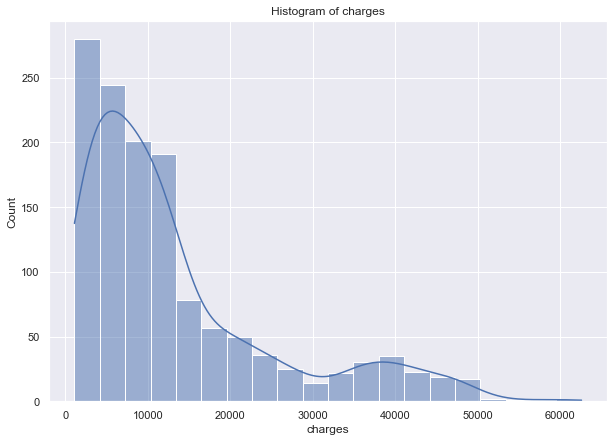

In [71]:
def charges():
    rcParams['figure.figsize'] = 10, 7
    sns.histplot(file['charges'], bins=20,kde=True)
    _ = plt.title("Histogram of charges")
charges()

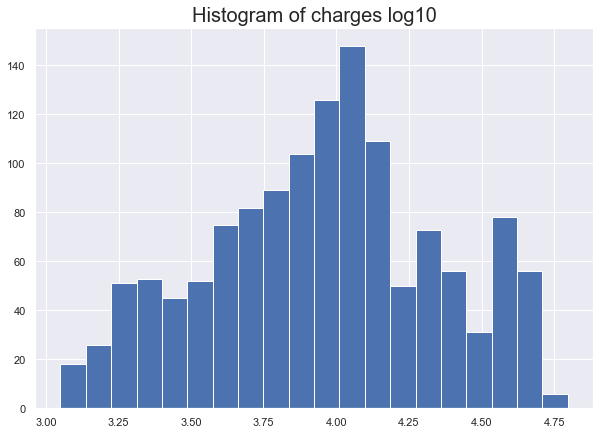

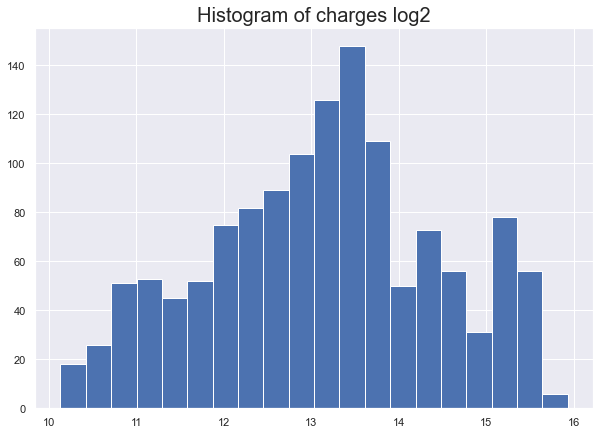

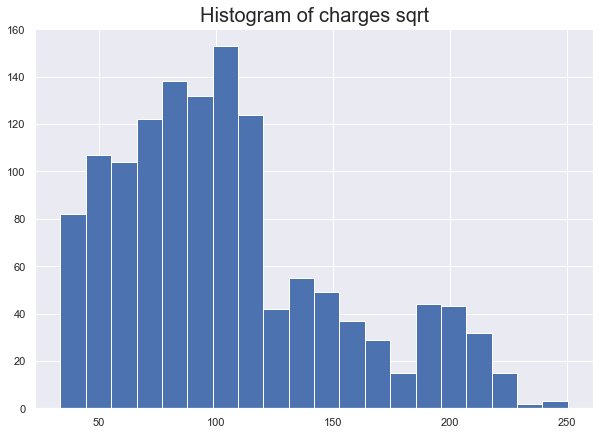

In [72]:
def hist_charges():
    nums={'log10': np.log10, 'log2': np.log2,'sqrt': np.sqrt}
    for key , value in nums.items():
        a="Histogram of charges "+str(key)
        plt.hist(value(file['charges']), bins=20)
        _ = plt.title(a, size=20)
        plt.show()
hist_charges()

In [73]:
#GRIDCV log10
l3=[]
y_train_log=np.log10(y_train)
boo=['dart','gbtree']
for boost in boo:
    model_x3=xgb.XGBRegressor(booster=boost)
    gs=GridSearchCV(estimator=model_x3,
                param_grid=params,
                scoring=["r2","neg_root_mean_squared_error"],
                refit="r2",
                cv=5,n_jobs=6,
                verbose=4)

    gs.fit(X_train,y_train_log)
    y_predgs_log=gs.predict(X_test)
    y_predgs=10**y_predgs_log
    r2 = r2_score(y_test, y_pred)
    score=gs.score(X_test,y_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_predgs))
    mae=mean_absolute_error(y_test,y_predgs)
    print('Score : ', score)
    print('RMSE:  ', rmse)
    print('MAE', mae)
    print('best_params: ',gs.best_params_)
    l3.append([boost,'Score : ', score, 'r2 : ',r2, 'RMSE' ,  rmse,'MAE' , mae,'best_params', gs.best_params_, 'params_estimator',gs.best_estimator_])
    print(l3)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Score :  -1.214397429099865
RMSE:   4591.281143523218
MAE 2152.4679978503877
best_params:  {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
[['dart', 'Score : ', -1.214397429099865, 'r2 : ', 0.7633311194050747, 'RMSE', 4591.281143523218, 'MAE', 2152.4679978503877, 'best_params', {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}, 'params_estimator', XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg

In [82]:
print(l3)

[['dart', 'Score : ', -1.214397429099865, 'r2 : ', 0.7633311194050747, 'RMSE', 4591.281143523218, 'MAE', 2152.4679978503877, 'best_params', {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}, 'params_estimator', XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)], ['gbtree', 'Score : ', -1.2143972219409949, 'r2 : ', 0.7633311194050747, 'RMSE', 4581.520765829828, 'MAE', 2200

In [78]:
#grind sqrt
params={
    "learning_rate" : [0.05,0.10,0.15,0.20],
    "max_depth" : [3,4,5,6,8] ,
    "colsample_bytree" : [0.5,0.7],
    "n_estimators" : [7,15,30,50,70,100,150,250],
    'gamma' : [0.01,0.1]
    
}
boo=['dart','gbtree']
l=[]
y_train_sqrt=np.sqrt(y_train)
for boost in boo:
    y_train_sqrt=np.sqrt(y_train)
    model_x3=xgb.XGBRegressor(booster=boost)
    gs=GridSearchCV(estimator=model_x3,
                param_grid=params,
                scoring=["r2","neg_root_mean_squared_error"],
                refit="r2",
                cv=5, n_jobs=8,
                verbose=4)

    gs.fit(X_train,y_train_sqrt)
    y_predgs_sqrt=gs.predict(X_test)
    y_predgs=y_predgs_sqrt**2
    gs.score(X_train,y_train)
    gs.score(X_test,y_test)
    score=gs.score(X_test,y_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_predgs))
    mae=mean_absolute_error(y_test,y_predgs)
    print('================================')
    print('Score : ', score)
    print('RMSE:  ', rmse)
    print('MAE', mae)
    print('best_params: ',gs.best_params_)
    print('================================')
    l.append([boost,'Score : ', score,'RMSE :  ', rmse,'MAE :', mae,'best_params: ',gs.best_params_, 'params_estimator',gs.best_estimator_] )
    print(l)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
Score :  -1.189758227295409
RMSE:   4466.753356750145
MAE 2292.878279333392
best_params:  {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
[['dart', 'Score : ', -1.189758227295409, 'RMSE :  ', 4466.753356750145, 'MAE :', 2292.878279333392, 'best_params: ', {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}, 'params_estimator', XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             

In [79]:
print("Gridsearchcv sqrt ",l)

Gridsearchcv sqrt  [['dart', 'Score : ', -1.189758227295409, 'RMSE :  ', 4466.753356750145, 'MAE :', 2292.878279333392, 'best_params: ', {'colsample_bytree': 0.7, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}, 'params_estimator', XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)], ['gbtree', 'Score : ', -1.1897798051615869, 'RMSE :  ', 4453.4115705446475, 'MAE :', 2264.149974481908, 'best_para

In [66]:
#num
model=xgb.XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=model.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae=mean_absolute_error(y_test,y_pred)
print('Score : ', score)
print('RMSE:  ', rmse)
print('MAE', mae)

Score :  0.8690007895063394
RMSE:   4464.284062797853
MAE 2581.819078076588


In [67]:
#log10
y_train_log=np.log10(y_train)
model_v1=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model_v1.fit(X_train,y_train_log)
y_pred_log=model_v1.predict(X_test)
y_pred_log=10**y_pred_log
r2 = r2_score(y_test, y_pred_log)
score=model_v1.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_log))
mae=mean_absolute_error(y_test,y_pred_log)
print('Score : ', score)
print('r2', r2)
print('RMSE:  ', rmse)
print('MAE', mae)

Score :  -1.2143972219409949
r2 0.8620300982740137
RMSE:   4581.520765829828
MAE 2200.706764868519


In [68]:
#sqrt
y_train_sqrt=np.sqrt(y_train)

model_v2=xgb.XGBRegressor( base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.01, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model_v2.fit(X_train,y_train_sqrt)
y_pred_sqrt=model_v2.predict(X_test)
y_pred_sqrt=y_pred_sqrt**2
score=model_v2.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_sqrt))
mae=mean_absolute_error(y_test,y_pred_sqrt)
r2 = r2_score(y_test, y_pred_sqrt)
print('r2', r2)
print('Score : ', score)
print('RMSE:  ', rmse)
print('MAE', mae)


r2 0.8696380937181631
Score :  -1.1897798051615869
RMSE:   4453.4115705446475
MAE 2264.149974481908


num


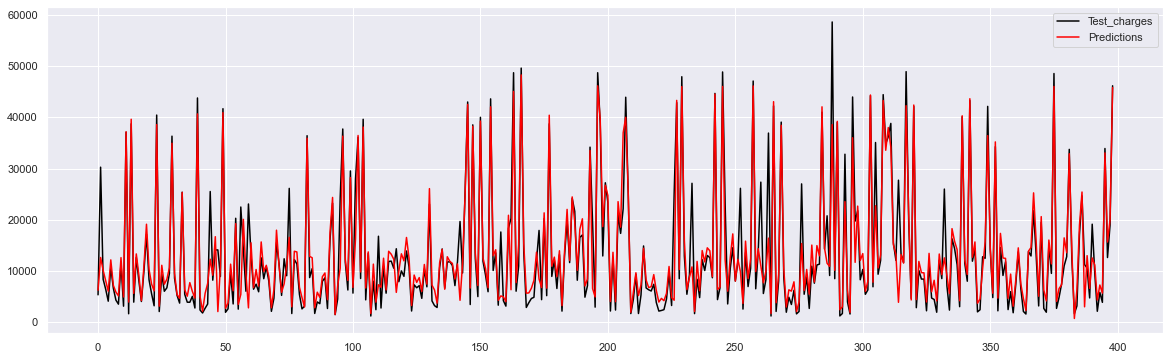

log10


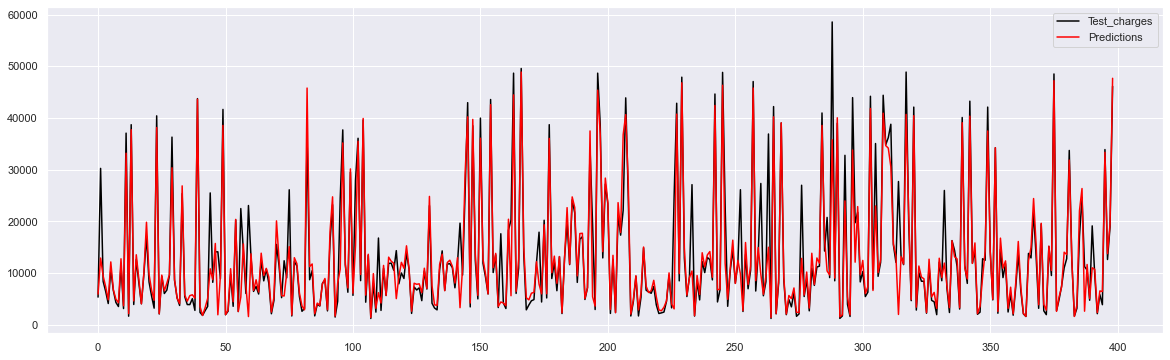

sqrt


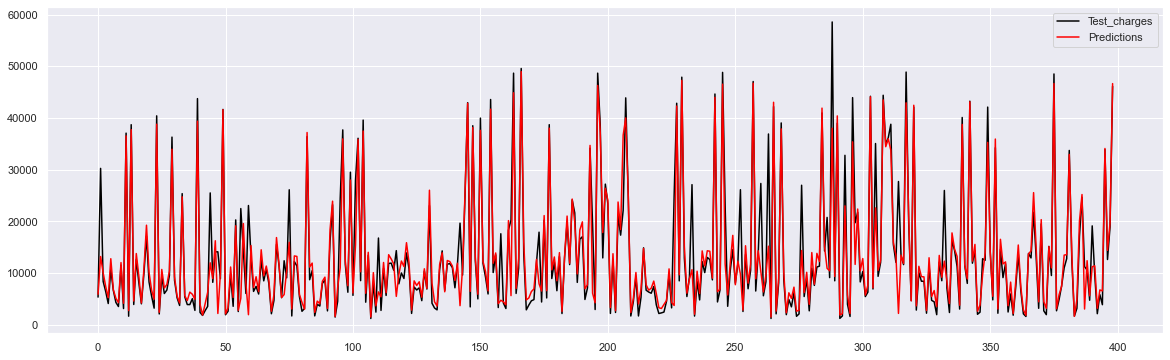

In [86]:

def pred_plot():
    predict={'num':y_pred,'log10':y_pred_log,'sqrt':y_pred_sqrt}
    for key , value in predict.items():
        print(key)
        plt.figure(figsize=(20,6))
        plt.plot(np.arange(len(y_test)), y_test, color='black', label='Test_charges')
        plt.plot(np.arange(len(value)), value, color='red' ,label='Predictions')
        plt.legend()
        plt.show()
pred_plot()

num


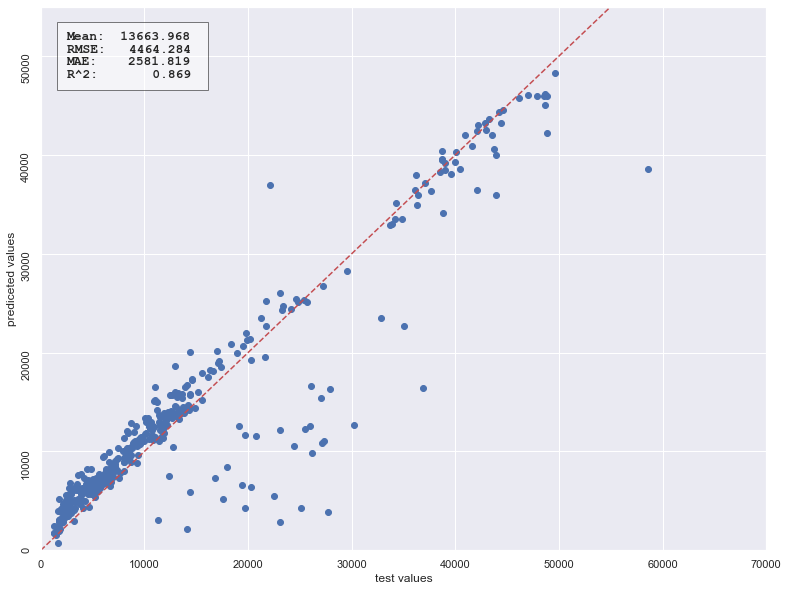

log10


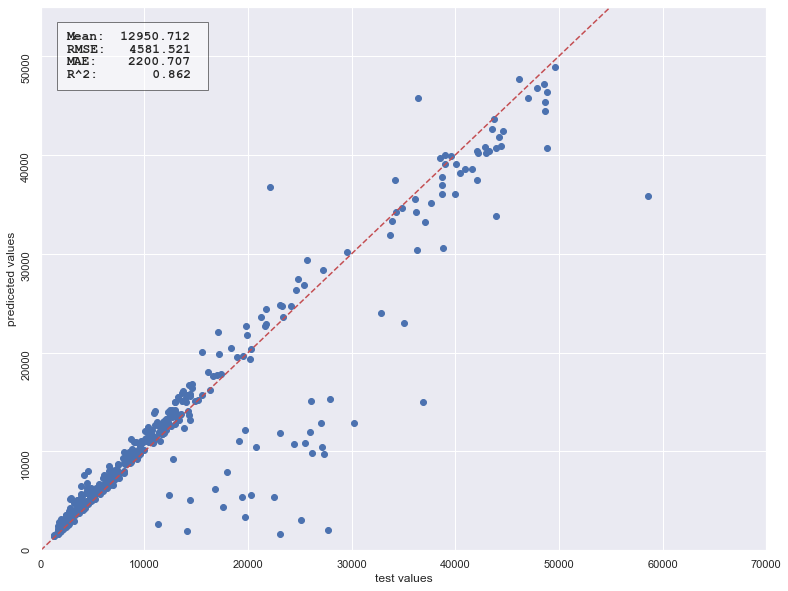

sqrt


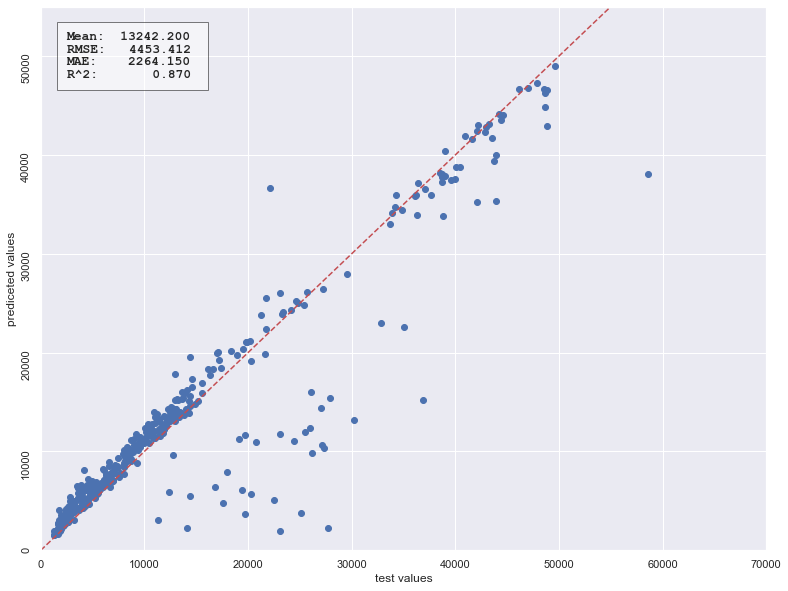

In [88]:
def model_summary():
    predict={'num':y_pred,'log10':y_pred_log,'sqrt':y_pred_sqrt}
    for key , value in predict.items(): 
        print(key)   
        max = 55000
        sns.set(rc={'figure.figsize':(13,10)})
        plt.xlim(0,70000)
        plt.ylim(0,max)
        plt.scatter(y_test,value)
        plt.yticks(rotation="90")
        plt.xlabel("test values")
        plt.ylabel("prediceted values")
        plt.plot([0,max],[0,max],'r--')
        mae = mean_absolute_error(y_test, value)
        r2 = r2_score(y_test, value)
        rmse = mean_squared_error(y_test, value, squared=False)
        #plt.title(str(title).upper(), font={'size':16})
        t1, t2, t3, t4 = "Mean:", "RMSE:", "MAE:", "R^2:"
        s1, s2, s3, s4 = format(value.mean(),'.3f'), format(rmse,'.3f'), format(mae,'.3f'), format(r2,'.3f')
        plt.annotate(f"{t1} {s1:>10} \n{t2} {s2:>10} \n{t3} {s3:>11} \n{t4} {s4:>11}", [2500,max*.87],
                            font={'size':13, 'family':'courier new', 'weight':'bold'},
                            bbox={'facecolor': 'white', 'edgecolor' : 'black', 'alpha': 0.5, 'pad': 10})
        plt.show()

model_summary()

num


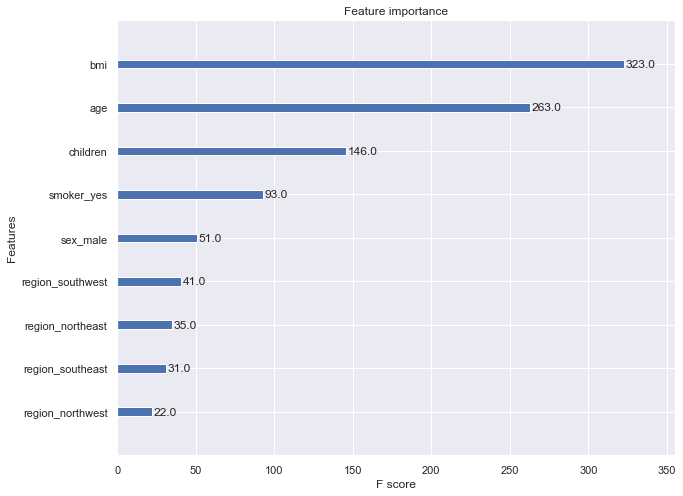

log10


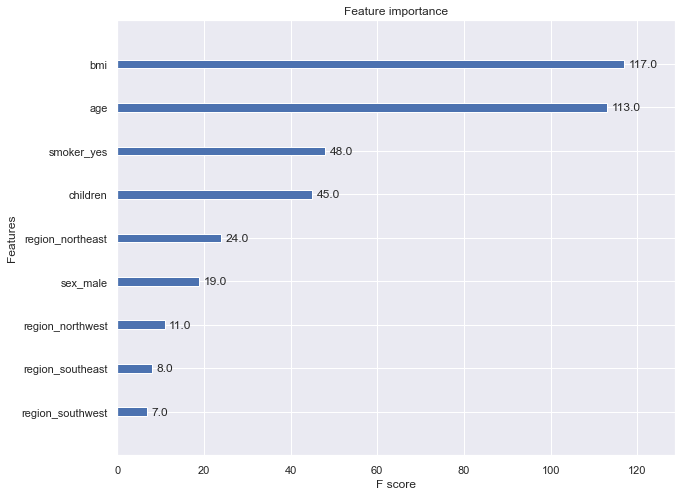

sqrt


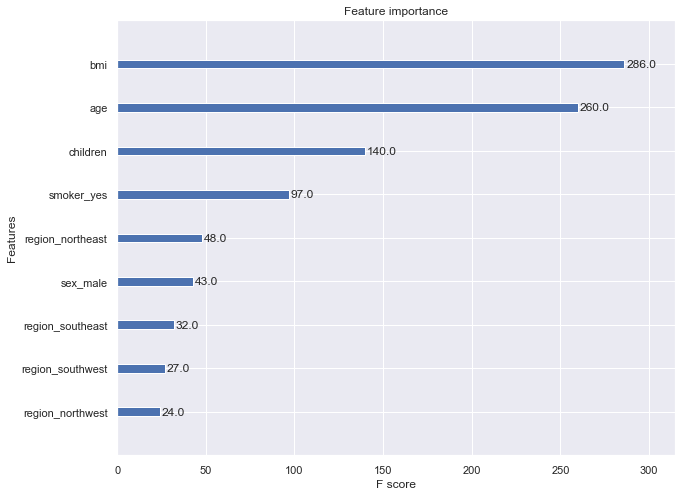

In [92]:
def feature():
    predict={'num':model,'log10':model_v1,'sqrt':model_v2}
    for key , value in predict.items():  
        print(key)    
        from matplotlib.pylab import rcParams
        rcParams['figure.figsize'] = 10, 8
        xgb.plot_importance(value)
        plt.show()
feature()

Model sqrt najlepsze wyniki